## MATH0058 Computational Methods Assignment 2

Let $A_n$ be the $n\times n$ matrix defined by $a_{jj} =2$ for $1\leq j\leq n$, $a_{j,j-1} =-1$ for $2\leq j \leq n $ and $a_{j,j+1} = - 1$ for $1\leq j\leq n-1$. 

Hence, $A_n$ is a matrix with the diagonal being constant 2 and the direct upper and lower off-diagonal are constant -1.

Let $\hat{b}_n = [1/n^2, . . . , 1/n^2]^T \in \mathbb{R}^n$. Let $xˆn$ be the vector defined by $(\hat{x}_n)i =i/(n+1),i=1,...,n.$

Using Python solve the system $A_n\hat{y}_n = b_n$ for $n = 20.$ 

Plot $\hat{y}n$ against $\hat{x}_n$. In the same graphic plot the solution y from part a) evaluated in the points $\hat{x}_n$. 

Consider the same computation using the modified right handside $\hat{b}_n =[1/(n+1)^2,...,1/(n+1)^2]^T \in \mathbb{R}^n$ and plot the solution in the same graphic.

In [85]:
from scipy.sparse import diags
import numpy as np
from numpy import linalg as LA


n = 20
k = [np.ones(n-1),-2*np.ones(n),np.ones(n-1)]
offset = [-1,0,1]
A = diags(k,offset).toarray()
B_hat = np.array([1/((n+1)**2) for _ in range(n)]).T
X_hat = [i/(n+1) for i in range(n)]
B_tilde = np.array([1/((n+2)**2) for _ in range(n)]).T

#finding Y
Y_hat = np.dot(B_hat,np.linalg.inv(A))
y = [-(x**2)+1 for x in X_hat ]
Y_tilde = np.dot(B_tilde,np.linalg.inv(A)) 

## Plot

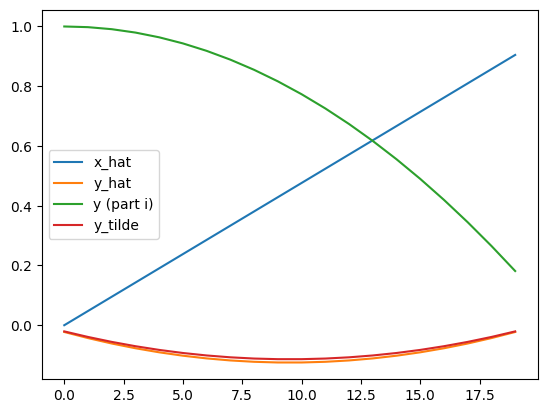

In [74]:

import matplotlib.pyplot as plt

plt.plot(X_hat, label='x_hat')
plt.plot(Y_hat, label='y_hat')
plt.plot(y,label="y (part i)")
plt.plot(Y_tilde,label="y_tilde")

# plt.title('Two Lists')
plt.legend()

plt.show()

For $n\in \{20, 40, 80, 160\}$ solve $A_n\hat{y}_n = \hat{b}_n$, compute $\hat{e}_n\in\mathbb{R}^n$ defined by
$$(\hat{e}_n)_i =y((\hat{x}_n)_i)-(\hat{y}_n)_i,i=1...,n$$ 
and $$E_n =n^{1/2}\|\hat{e}_n\|_2.$$
Here $y((\hat{x}_n)_i)$ denotes the function found in part (a) evaluated at the position $(\hat{x}_n)_i$. Now plot $E_n$ against $n$ with a log scaling of the axes. Report the result. Can you deduce a relation on the form $E_n=\mathcal{O}(n^s)$, from the plot and specify $s$?

In [88]:
set_n = [20,40,80,160]

def solution(n):
    #making tridiagonal matrix
    k = [np.ones(n-1),-2*np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    A = diags(k,offset).toarray()

    
    B_hat = np.array([1/((n+1)**2) for _ in range(n)]).T
    X_hat = [i/(n+1) for i in range(n)]

    #finding Y
    Y_hat = np.dot(B_hat,np.linalg.inv(A))
    y = [-(x**2)+1 for x in X_hat ]
    
    #finding e_i iterating simultaneously
    e_ni = [a-b for (a,b) in zip(y,Y_hat)]
    #2-norm equation
    E_n = n**(1/2)*LA.norm(e_ni,2)
    return E_n
    
set_soln = [solution(n) for n in set_n] 
print(f"Results are : {set_soln}")

[17.012201712932935, 33.256467703372046, 65.71937483396069, 130.63330097486173]

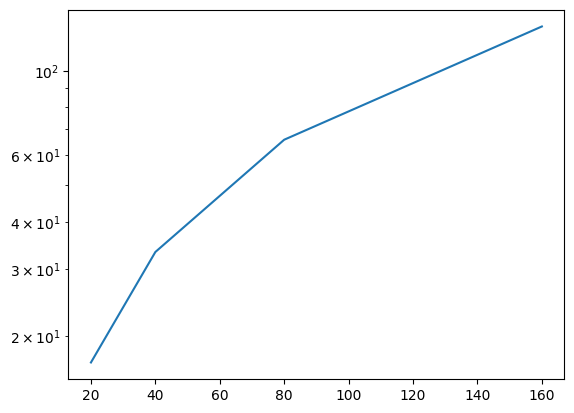

In [90]:
plt.yscale("log") 
plt.plot(set_n,set_soln)
plt.show()

For $n\in \{20, 40, 80, 160\}$ compute $c_n = \kappa_2 (A_n)$, the conditioning of $A_n \in\mathbb{R}^{n\times n}$. Using log-scaling of the axis plot $c_n$ against $n$. Can you deduce a relation on the form $c_n = \mathcal{O}(n^r)$, from the plot and specify $r$?

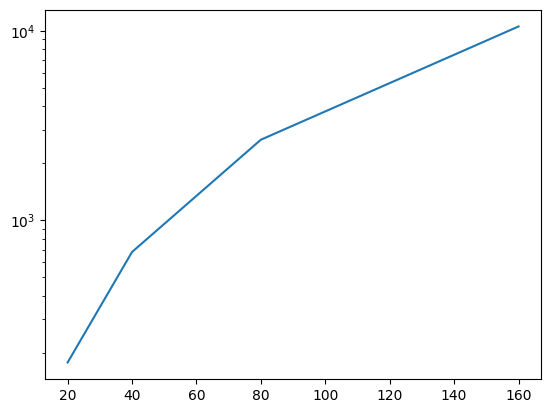

In [92]:
def tridiagonal_mat(n):
    #making tridiagonal matrix
    k = [np.ones(n-1),-2*np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    A = diags(k,offset).toarray()
    return A

set_An = [tridiagonal_mat(n) for n in set_n]
set_cond = [LA.cond(an,2) for an in set_An]

plt.yscale("log") 
plt.plot(set_n,set_cond)
plt.show()